In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Reads csv and remove some data
df = pd.read_csv('diabetes.csv')

# I am trying to optimize
# BloodPressure of 0 is insane an means death - so values with 0 are equal to Null
mean_bp = df[df['BloodPressure'] != 0]['BloodPressure'].mean(skipna=True,)
mean_bp = round(mean_bp)

df['BloodPressure'] = df['BloodPressure'].replace(0, mean_bp)

# Same as for BloodPressure, 0 Insulin is nonsense. Not sure if mean is the right way to go
# mean feels counter intuitive but i have no better idea at the moment
mean_in = df[df['Insulin'] != 0]['Insulin'].mean(skipna=True)
mean_in = round(mean_in)

df['Insulin'] = df['Insulin'].replace(0, mean_in)

df = df.drop(columns=['SkinThickness'])
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,156,33.6,0.627,50,1
1,1,85,66,156,26.6,0.351,31,0
2,8,183,64,156,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,156,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,156,30.1,0.349,47,1


In [3]:
# Split data in X and Y to separate into Features and Outcome. Than split each again in train and test.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the RandomForest (I have no idea what parameters work best or what arguments to change/tune,
# there are a billion of them and i have no idea what to do, but i guess that's the exercise.)
# Estimators and random_state is suggested by gpt 
clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fits  evaluating the Model
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [4]:
# NOTE some experimenting for fun
df = pd.read_csv('diabetes.csv')

# I want to see if i can predict the missing values in BP and IN
# I think this could result in better data and ultimately in a better model to predict diabetes
# I start with BP

df = df.drop(columns=['Insulin'])
df = df.drop(columns=['SkinThickness'])

data = df[df['BloodPressure'] != 0]
ToPredict = df[df['BloodPressure'] == 0]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X = data.drop(columns=['BloodPressure'])
y = data['BloodPressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the RandomForest (I have no idea what parameters work best or what arguments to change/tune,
# there are a billion of them and i have no idea what to do, but i guess that's the exercise.)
# Estimators and random_state is suggested by gpt 
clf = RandomForestRegressor(n_estimators=3000, random_state=42)

# Fits  evaluating the Model
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

def lenient_accuracy(y_true, y_pred):
  """Calculates the percentage of predictions within 5 points of the true value."""
  return np.mean(np.abs(y_true - y_pred) <= 5)

# Calculate and print lenient accuracy
lenient_score = lenient_accuracy(y_test, y_pred)
print(f"Lenient Accuracy: {lenient_score:.2f}")



Lenient Accuracy: 0.39


Random Forest - Number of predictions outside lenient range: 89
Mean Prediction - Number of predictions outside lenient range: 102
Random Forest - Average error for those predictions: 12.277097378277155
Mean Prediction - Average error for those predictions: 13.019607843137255


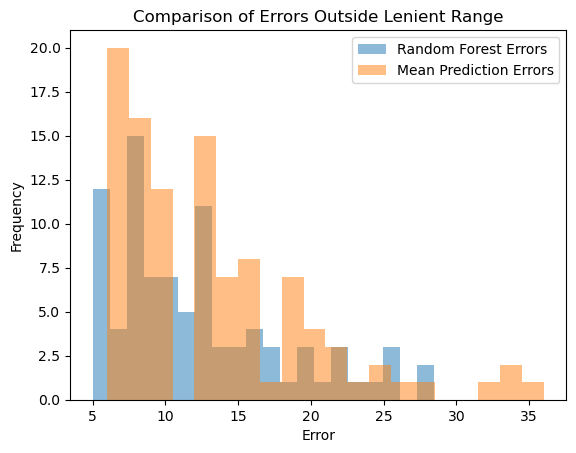

In [5]:
# Calculate the absolute differences between true and predicted values
errors = np.abs(y_test - y_pred)

# Get the errors for predictions OUTSIDE the lenient range
large_errors = errors[errors > 5] 

# 1. Calculate the mean blood pressure
mean_bp = np.mean(y_train)  # Calculate mean from training data

# 2. Predict using the mean for all test instances
mean_predictions = np.full_like(y_test, mean_bp)  

# 3. Calculate errors using the mean prediction
mean_errors = np.abs(y_test - mean_predictions) 

# 4. Get errors outside the lenient range for the mean predictions
mean_large_errors = mean_errors[mean_errors > 5]

# 5. Analyze and compare
print("Random Forest - Number of predictions outside lenient range:", len(large_errors))
print("Mean Prediction - Number of predictions outside lenient range:", len(mean_large_errors))

print("Random Forest - Average error for those predictions:", np.mean(large_errors))
print("Mean Prediction - Average error for those predictions:", np.mean(mean_large_errors))

# 6. (Optional) Visual comparison
plt.hist(large_errors, bins=20, alpha=0.5, label="Random Forest Errors")
plt.hist(mean_large_errors, bins=20, alpha=0.5, label="Mean Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Comparison of Errors Outside Lenient Range")
plt.legend()
plt.show()

In [8]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [5]:
from manim import *

class CompareErrors(Scene):
    def construct(self):
        # Data
        rf_large_errors_count = len(large_errors)
        mean_large_errors_count = len(mean_large_errors)
        rf_avg_error = np.mean(large_errors)
        mean_avg_error = np.mean(mean_large_errors)

        # Create bars for the number of predictions outside lenient range
        rf_bar = Rectangle(height=rf_large_errors_count / 10, width=1, fill_color=BLUE, fill_opacity=0.75)
        mean_bar = Rectangle(height=mean_large_errors_count / 10, width=1, fill_color=GREEN, fill_opacity=0.75)

        # Position bars
        rf_bar.next_to(ORIGIN, LEFT, buff=1)
        mean_bar.next_to(ORIGIN, RIGHT, buff=1)

        # Create labels
        rf_label = Text(f"RF: {rf_large_errors_count}", font_size=24).next_to(rf_bar, UP)
        mean_label = Text(f"Mean: {mean_large_errors_count}", font_size=24).next_to(mean_bar, UP)

        # Create average error text
        rf_avg_text = Text(f"RF Avg Error: {rf_avg_error:.2f}", font_size=24).next_to(rf_bar, DOWN)
        mean_avg_text = Text(f"Mean Avg Error: {mean_avg_error:.2f}", font_size=24).next_to(mean_bar, DOWN)

        # Animate bars and labels
        self.play(Create(rf_bar), Create(mean_bar))
        self.play(Write(rf_label), Write(mean_label))
        self.play(Write(rf_avg_text), Write(mean_avg_text))

        # Wait before ending the scene
        self.wait(2)